In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os
from tqdm import tqdm
import seaborn as sns


import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
#import ace_tools as tools
# OR, if using Jupyter Notebook
from IPython.display import display
#display(clustered_features_df)

In [2]:
def read_all_csv_files(directory_path, features, limit=10000):
    # Initialize an empty list to store dataframes from CSV files
    dataframes = []

    # Get a list of all files in the directory
    file_list = os.listdir(directory_path)

    # Loop through each file and check if it's a CSV file
    for file_name in file_list:
        if file_name.endswith('.csv'):
            # Get the full file path
            file_path = os.path.join(directory_path, file_name)
            # Read the CSV file into a pandas DataFrame
            df = pd.read_csv(file_path)
            # Remove leading and trailing spaces from column names
            df.columns = df.columns.str.strip()
            # Append the DataFrame to the list
            dataframes.append(df[features])

    # Merge all DataFrames into a single DataFrame
    merged_df = pd.concat(dataframes, ignore_index=True)
    print("Initial Row: {}".format(merged_df.shape[0]))
    
    #applying limit if row_count > limit
    if len(merged_df) > limit:
        print("As Row Exceeds {0}, we are taking upto {1} rows".format(limit, limit))
        merged_df = merged_df.sample(limit, random_state=42)
    
    return merged_df


In [3]:
#Data Sources
PATH = './dataset'
clients = {
    'client_1': f"{PATH}/client_1/client_1_original_dataset.csv",
    'client_2': f"{PATH}/client_2/client_2_original_dataset.csv",
    'client_3': f"{PATH}/client_3/client_3_original_dataset.csv",
    'client_4': f"{PATH}/client_4/client_4_original_dataset.csv"
}

In [4]:
#Tick Names and Numbers
tick_list = list(clients.keys())
tick_numbers = list(range(1, len(tick_list)+1))
print("Tick Lists: {}".format(tick_list))
print("Tick Numbers: {}".format(tick_numbers))

Tick Lists: ['client_1', 'client_2', 'client_3', 'client_4']
Tick Numbers: [1, 2, 3, 4]


In [5]:
for key, element in tqdm(clients.items(), total=len(clients)):
    dataframe = pd.read_csv(element)
    locals()[key] = dataframe
    print(f"---------------------{key}----------------------------------")
    print(dataframe.groupby(['Label']).size().reset_index(name="Count"))
    print("------------------------------------------------------------------")



 25%|██████████████████████████████▊                                                                                            | 1/4 [00:05<00:15,  5.11s/it]

---------------------client_1----------------------------------
   Label   Count
0      0  202821
1      1  217179
------------------------------------------------------------------


 50%|█████████████████████████████████████████████████████████████▌                                                             | 2/4 [00:09<00:09,  4.89s/it]

---------------------client_2----------------------------------
   Label   Count
0      0  185943
1      1  234057
------------------------------------------------------------------


 75%|████████████████████████████████████████████████████████████████████████████████████████████▎                              | 3/4 [00:14<00:04,  4.65s/it]

---------------------client_3----------------------------------
   Label   Count
0      0  210000
1      1  210000
------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:18<00:00,  4.65s/it]

---------------------client_4----------------------------------
   Label   Count
0      0  210000
1      1  210000
------------------------------------------------------------------


In [6]:
# def draw_box_plot(data, tick_numbers, tick_list, title, x_label="", y_label="", show_outliers=False):
#     fig, ax = plt.subplots(figsize=(6,4))
#     plt.suptitle(title)
#     ax = fig.add_axes([0, 0, 1, 1])
#     bp = ax.boxplot(data, showfliers=show_outliers, patch_artist=True)
#     plt.xticks(tick_numbers, tick_list)
#     plt.xticks(rotation=90)
#     ax.set_ylabel(y_label)
#     plt.show()

In [ ]:
# ##Flow Duration
# data = []
# for key, element in clients.items():
#     data.append(locals()[key]['Flow Duration']/1000000)

# draw_box_plot(data, tick_numbers, tick_list, 'Flow Duration', '', 'Seconds', True)

# #draw_box_plot(data, tick_numbers, tick_list, 'Flow Duration', '', 'Seconds', False)


In [ ]:
# ##Total  Packets
# data = []
# for key, element in clients.items():
#     data.append(locals()[key]['Total Bwd packets'] + locals()[key]['Total Fwd Packet'])

# draw_box_plot(data, tick_numbers, tick_list, 'Total Packet Count', '', 'Count', True)
# #draw_box_plot(data, tick_numbers, tick_list, 'Total Packet Count', '', 'Count', False)    

In [ ]:
# ##Total Lenght of Packets Packets
# data = []
# for key, element in clients.items():
#     data.append(locals()[key]['Packet Length Mean'])

# draw_box_plot(data, tick_numbers, tick_list, 'Packet Length Mean', '', 'Byte', True)
# #draw_box_plot(data, tick_numbers, tick_list, 'Packet Length Mean', '', 'Byte', False)


In [ ]:
# ##TFlow Bytes/s (kbps)
# data = []
# for key, element in clients.items():
#     data.append(locals()[key]['Flow Bytes/s']*8/1000000) #making it kbps from Byte/s

# draw_box_plot(data, tick_numbers, tick_list, 'Flow Bytes/s', '', 'Mbps', True)
# #draw_box_plot(data, tick_numbers, tick_list, 'Flow Bytes/s', '', 'Kbps', False)


In [ ]:
# ##TFlow Bytes/s (kbps)
# data = []
# for key, element in clients.items():
#     data.append(locals()[key]['Flow Packets/s']*8/1000) #making it kbps from Byte/s

# draw_box_plot(data, tick_numbers, tick_list, 'Flow Packets/s', '', 'Packets/s', True)
# draw_box_plot(data, tick_numbers, tick_list, 'Flow Packets/s', '', 'Packets/s', False)

## Manual Feature Analysis

In [6]:
test_features = ['Flow Duration' ,'Total Fwd Packet' ,'Total Bwd packets' ,'Total Length of Fwd Packet' ,'Total Length of Bwd Packet' ,'Fwd Packet Length Max' ,'Fwd Packet Length Min' ,'Fwd Packet Length Std' ,'Bwd Packet Length Max' ,'Bwd Packet Length Min' ,'Bwd Packet Length Std' ,'Flow IAT Mean' ,'Flow IAT Std' ,'Flow IAT Max' ,'Flow IAT Min' ,'Fwd IAT Total' ,'Fwd IAT Std' ,'Fwd IAT Max' ,'Fwd IAT Min' ,'Bwd IAT Total' ,'Bwd IAT Std' ,'Bwd IAT Max' ,'Bwd IAT Min' ,'Fwd Header Length' ,'Bwd Header Length' ,'Packet Length Min' ,'Packet Length Max' ,'Packet Length Std' ,'Packet Length Variance' ,'FWD Init Win Bytes' ,'Bwd Init Win Bytes' ,'Fwd Act Data Pkts' ,'Fwd Seg Size Min' ,'Active Mean' ,'Active Std' ,'Active Max' ,'Active Min' ,'Idle Mean' ,'Idle Std' ,'Idle Max' ,'Idle Min', 'Label']

In [22]:
# def measure_correlation(df, co_efficent=0.2, precision=5, noise_level=1e-6):
#     # Calculate correlation matrix for numeric features
#     correlation_matrix = df.corr()    
#     # Find features with low correlation with other features
#     # We use 0.2 as the threshold for weak correlation (you can adjust it as needed)

#     # We use 0.2 as the threshold for weak correlation (you can adjust it as needed)
#     independent_features = correlation_matrix[correlation_matrix.abs() < co_efficent].count().sort_values(ascending=False)
    
#     # Create a DataFrame with the feature names and their respective counts of low-correlation (independent) scores
#     independent_features_df = pd.DataFrame({
#         'Feature': independent_features.index,
#         'Score': independent_features.values
#     })
     

#     # Draw a heatmap for the correlation matrix
#     plt.figure(figsize=(12, 10))
#     sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
    
#     # Display the heatmap
#     plt.title('Correlation Matrix of Features')
#     plt.show()
#     return independent_features_df

In [23]:
# def measure_correlation(df, co_efficent=0.2, precision=5, noise_level=1e-6):
#     """
#     Measures feature independence using correlation and ensures unique scores.
    
#     Args:
#         df (pd.DataFrame): Input DataFrame.
#         co_efficent (float): Threshold for weak correlation.
#         precision (int): Decimal places for correlation matrix.
#         noise_level (float): Tiny noise added to break ties.

#     Returns:
#         pd.DataFrame: Independent features with unique scores.
#     """

#     # Calculate correlation matrix with high precision
#     correlation_matrix = df.corr().round(precision)  # Ensure precise computation
    
#     # Find independent features based on the threshold
#     independent_features = correlation_matrix[correlation_matrix.abs() < co_efficent].count().sort_values(ascending=False)

#     # Store as DataFrame
#     independent_features_df = pd.DataFrame({
#         'Feature': independent_features.index,
#         'Score': independent_features.values
#     })

#     # Apply tie-breaking by adding tiny noise
#     independent_features_df["Score"] += np.random.uniform(-noise_level, noise_level, size=len(independent_features_df))

#     # Re-sort to reflect the updated uniqueness
#     independent_features_df = independent_features_df.sort_values(by="Score", ascending=False).reset_index(drop=True)

#     # Draw a heatmap for better visualization
#     plt.figure(figsize=(12, 10))
#     sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
#     plt.title('Correlation Matrix of Features')
#     plt.show()

#     return independent_features_df

In [ ]:
# # Assuming 'clients' is a dictionary of client dataframes
# all_independent_features = pd.DataFrame()

# for key, element in clients.items():
#     print(key)
#     independent_features_df =  measure_correlation(locals()[key][test_features], co_efficent = 0.01)
#      # Rename 'Score' column to 'Score_X' where X is the current iteration number
#     independent_features_df.rename(columns={'Score': f'Score_{key}'}, inplace=True)

#     # Merge the results to keep the 'Feature' column as the common key
#     if all_independent_features.empty:
#         all_independent_features = independent_features_df
#     else:
#         all_independent_features = pd.merge(all_independent_features, independent_features_df, on='Feature', how='outer')

    
# # Display the final combined DataFrame
# #print(all_independent_features)  

In [27]:
#all_independent_features.to_csv("Feature_Correlation_Scores.csv", index=False)

In [7]:
def cluster_correlated_features(df, threshold=0.95):
    # Compute the correlation matrix
    correlation_matrix = df.corr().abs()  # Get absolute correlation values

    # Convert correlation matrix to distance matrix (1 - correlation)
    distance_matrix = 1 - correlation_matrix

    # Perform hierarchical clustering
    linkage_matrix = sch.linkage(distance_matrix, method='ward')
    
    # Create clusters based on the threshold
    cluster_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1-threshold, linkage='ward')
    cluster_labels = cluster_model.fit_predict(distance_matrix)

    # Create a DataFrame showing feature groups
    clustered_features = pd.DataFrame({
        "Feature": df.columns,
        "Cluster": cluster_labels
    })

    # Sort by cluster
    clustered_features = clustered_features.sort_values(by="Cluster")
    
    # Plot dendrogram
    plt.figure(figsize=(12, 6))
    sch.dendrogram(linkage_matrix, labels=df.columns, leaf_rotation=90)
    plt.title('Hierarchical Clustering Dendrogram of Features')
    plt.xlabel('Features')
    plt.ylabel('Distance')
    plt.show()
    
    return clustered_features


client_1


/tmp/ipykernel_2691752/1643645634.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(distance_matrix, method='ward')
/home/sharedrive/PythonCodes/.venv311_new/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


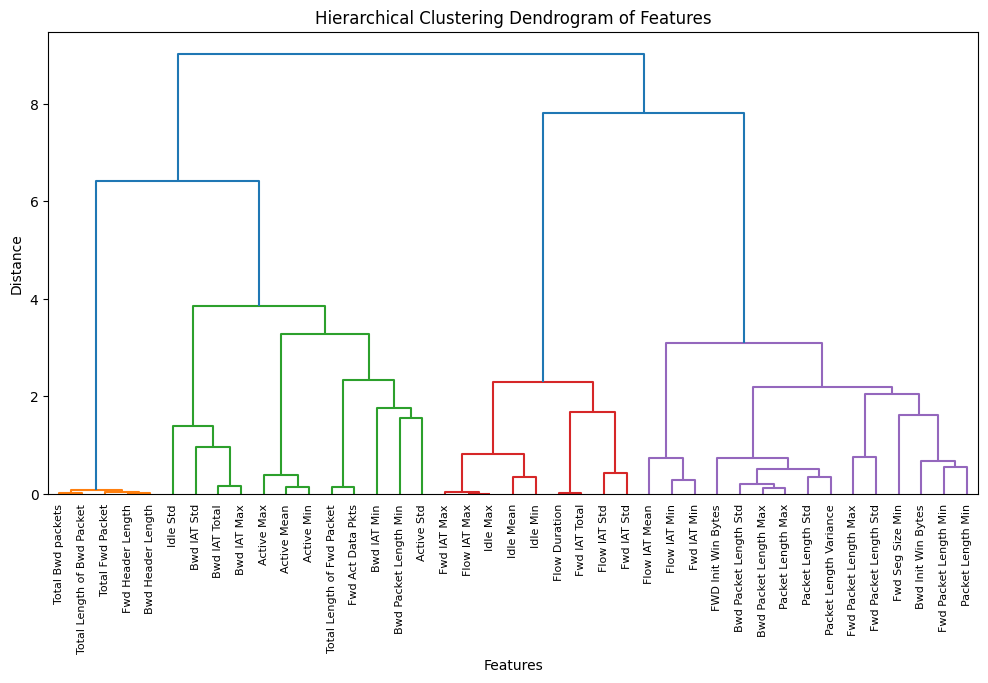

,Feature,Cluster
39,Idle Max,0
17,Fwd IAT Max,0
13,Flow IAT Max,0
1,Total Fwd Packet,1
24,Bwd Header Length,1
23,Fwd Header Length,1
0,Flow Duration,2
15,Fwd IAT Total,2
2,Total Bwd packets,3
4,Total Length of Bwd Packet,3


client_2


/tmp/ipykernel_2691752/1643645634.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(distance_matrix, method='ward')
/home/sharedrive/PythonCodes/.venv311_new/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


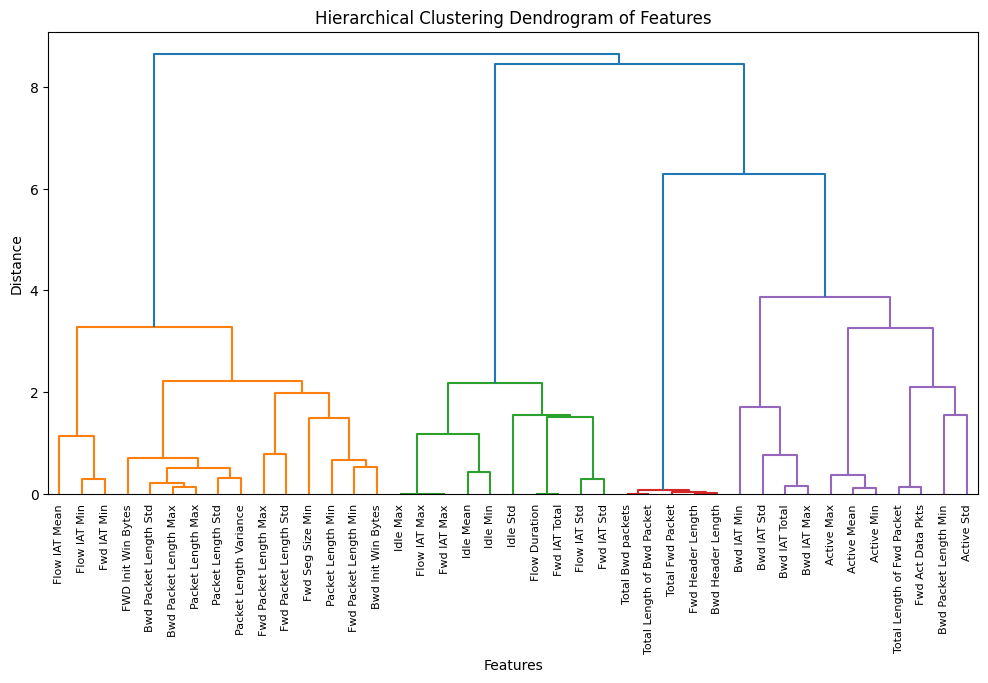

,Feature,Cluster
1,Total Fwd Packet,0
24,Bwd Header Length,0
23,Fwd Header Length,0
2,Total Bwd packets,1
4,Total Length of Bwd Packet,1
0,Flow Duration,2
15,Fwd IAT Total,2
39,Idle Max,3
17,Fwd IAT Max,3
13,Flow IAT Max,3


client_3


/tmp/ipykernel_2691752/1643645634.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(distance_matrix, method='ward')
/home/sharedrive/PythonCodes/.venv311_new/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


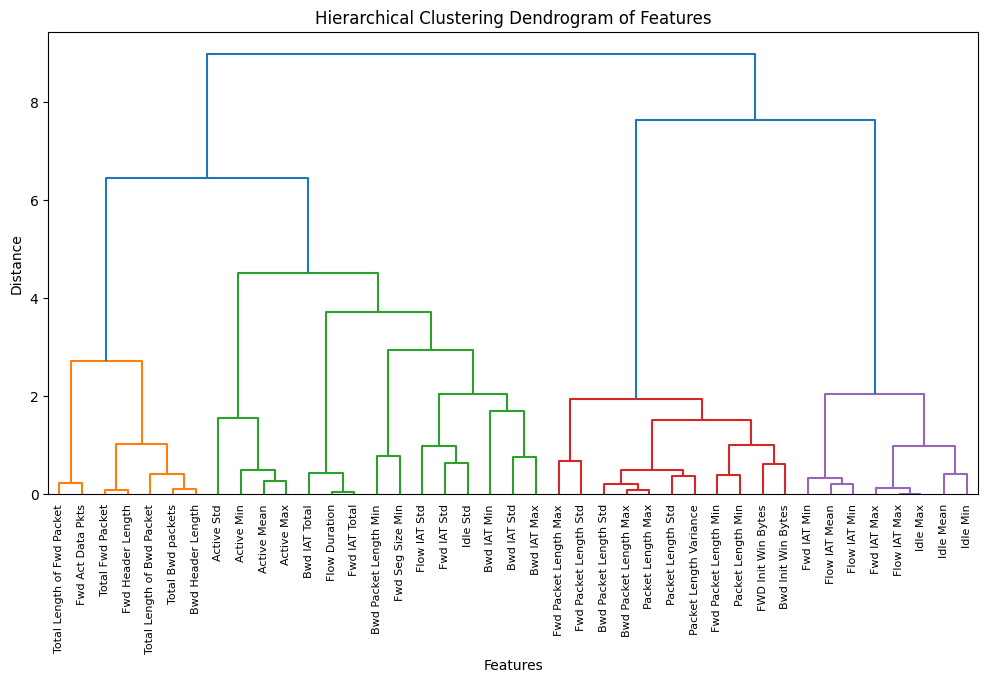

,Feature,Cluster
0,Flow Duration,0
15,Fwd IAT Total,0
39,Idle Max,1
13,Flow IAT Max,1
38,Idle Std,2
35,Active Max,3
40,Idle Min,4
36,Active Min,5
37,Idle Mean,6
33,Active Mean,7


client_4


/tmp/ipykernel_2691752/1643645634.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(distance_matrix, method='ward')
/home/sharedrive/PythonCodes/.venv311_new/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


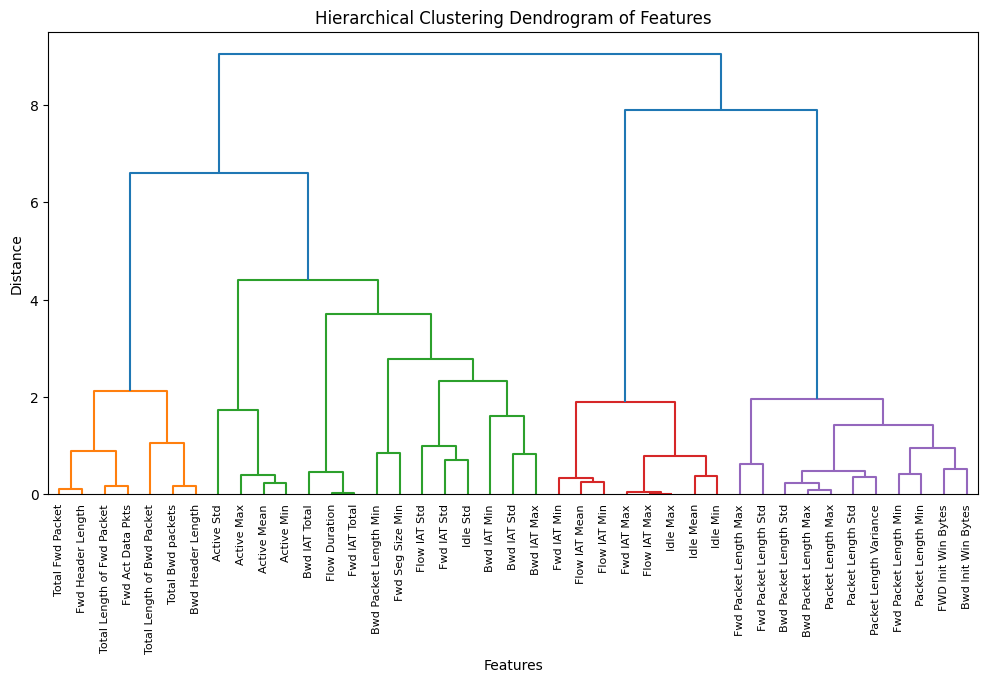

,Feature,Cluster
39,Idle Max,0
17,Fwd IAT Max,0
13,Flow IAT Max,0
0,Flow Duration,1
15,Fwd IAT Total,1
40,Idle Min,2
38,Idle Std,3
28,Packet Length Variance,4
34,Active Std,5
37,Idle Mean,6


In [10]:
for key, element in clients.items():
    print(key)
    df = locals()[key][test_features]
    df = df.drop(columns=["Label"])
    
    clustered_features_df = cluster_correlated_features(df, threshold=0.95)
    display(clustered_features_df)
    #tools.display_dataframe_to_user(name="Clustered Highly Correlated Features", dataframe=clustered_features_df)



## Make Cluster and then Calculate corelation with Label

In [11]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

def get_feature_clusters_and_correlation(df, label_column, cluster_threshold=0.95):
    """
    Performs feature clustering based on correlation and calculates feature-to-label correlation.
    
    :param df: Pandas DataFrame containing features and target label.
    :param label_column: The name of the target variable (binary classification).
    :param cluster_threshold: Threshold for clustering highly correlated features.
    
    :return: DataFrame with Feature Name, Cluster ID, and Correlation with Label.
    """
    # 1️⃣ Compute feature-to-feature correlation matrix
    feature_columns = [col for col in df.columns if col != label_column]
    correlation_matrix = df[feature_columns].corr().abs()  # Absolute correlation
    
    # 2️⃣ Convert correlation matrix to distance matrix (1 - correlation)
    distance_matrix = 1 - correlation_matrix
    
    # 3️⃣ Perform hierarchical clustering (ward linkage minimizes variance)
    linkage_matrix = sch.linkage(distance_matrix, method='ward')
    
    # 4️⃣ Agglomerative clustering to form clusters
    cluster_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1 - cluster_threshold, linkage='ward')
    cluster_labels = cluster_model.fit_predict(distance_matrix)
    
    # 5️⃣ Create DataFrame for feature clusters
    clustered_features = pd.DataFrame({
        "Feature": feature_columns,
        "Cluster": cluster_labels
    })
    
    # 6️⃣ Compute absolute correlation with the label (binary classification)
    feature_label_correlation = df[feature_columns].corrwith(df[label_column]).abs()
    
    # 7️⃣ Merge cluster information with feature-label correlation
    clustered_features["Label_Correlation"] = clustered_features["Feature"].map(feature_label_correlation)
    
    return clustered_features.sort_values(by="Cluster")



## Get the Best Features

In [17]:
def select_best_features_per_cluster(clustered_df):
    """
    Selects the best feature from each cluster based on the highest correlation with the label.
    Sorts the selected features by correlation and assigns a ranking.

    :param clustered_df: DataFrame containing Feature, Cluster, and Label_Correlation columns.
    :param output_file: Name of the CSV file to store the results.

    :return: Ranked DataFrame with the best feature per cluster.
    """
    # 1️⃣ Select the feature with the highest correlation per cluster
    best_features = clustered_df.loc[clustered_df.groupby("Cluster")["Label_Correlation"].idxmax()]
    
    # 2️⃣ Sort by correlation value in descending order
    best_features = best_features.sort_values(by="Label_Correlation", ascending=False).reset_index(drop=True)
    
    # 3️⃣ Add a rank column (1 = highest correlation)
    best_features.insert(0, "Rank", range(1, len(best_features) + 1))
    return best_features

In [20]:
for key, element in clients.items():
    print(key)
    df = locals()[key][test_features]
    clustered_result = get_feature_clusters_and_correlation(df, label_column="Label", cluster_threshold=0.9)   
    final_features = select_best_features_per_cluster(clustered_result)
    clustered_result.to_csv(f'./NonFL/clusterwise_features_{key}.csv', index=False)
    final_features.to_csv(f'./NonFL/final_features_{key}.csv', index=False)
    display(clustered_result)
    display(final_features)



client_1


/tmp/ipykernel_2691752/2158537172.py:23: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(distance_matrix, method='ward')
/home/sharedrive/PythonCodes/.venv311_new/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


,Feature,Cluster,Label_Correlation
1,Total Fwd Packet,0,0.012748
2,Total Bwd packets,0,0.008691
4,Total Length of Bwd Packet,0,0.007895
24,Bwd Header Length,0,0.007711
23,Fwd Header Length,0,0.011008
39,Idle Max,1,0.238877
17,Fwd IAT Max,1,0.237515
13,Flow IAT Max,1,0.236486
0,Flow Duration,2,0.122016
15,Fwd IAT Total,2,0.122583


,Rank,Feature,Cluster,Label_Correlation
0,1,Bwd Packet Length Max,33,0.933181
1,2,Bwd Packet Length Std,30,0.900274
2,3,Packet Length Max,15,0.898854
3,4,FWD Init Win Bytes,9,0.861087
4,5,Packet Length Std,13,0.826650
5,6,Packet Length Variance,19,0.817804
6,7,Fwd Packet Length Min,22,0.681210
7,8,Fwd Packet Length Max,18,0.584540
8,9,Bwd Init Win Bytes,10,0.557820
9,10,Fwd IAT Min,26,0.541037


client_2


/tmp/ipykernel_2691752/2158537172.py:23: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(distance_matrix, method='ward')
/home/sharedrive/PythonCodes/.venv311_new/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


,Feature,Cluster,Label_Correlation
1,Total Fwd Packet,0,0.012059
2,Total Bwd packets,0,0.008605
4,Total Length of Bwd Packet,0,0.007856
24,Bwd Header Length,0,0.007678
23,Fwd Header Length,0,0.009744
39,Idle Max,1,0.154467
17,Fwd IAT Max,1,0.152531
13,Flow IAT Max,1,0.152476
0,Flow Duration,2,0.096845
15,Fwd IAT Total,2,0.096949


,Rank,Feature,Cluster,Label_Correlation
0,1,Bwd Packet Length Max,32,0.937084
1,2,Bwd Packet Length Std,29,0.905302
2,3,Packet Length Max,14,0.903033
3,4,FWD Init Win Bytes,9,0.868370
4,5,Packet Length Std,26,0.829095
5,6,Packet Length Variance,33,0.826816
6,7,Fwd Packet Length Min,22,0.667853
7,8,Fwd Packet Length Max,18,0.595775
8,9,Bwd Init Win Bytes,8,0.553678
9,10,Packet Length Min,10,0.507496


client_3


/tmp/ipykernel_2691752/2158537172.py:23: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(distance_matrix, method='ward')
/home/sharedrive/PythonCodes/.venv311_new/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


,Feature,Cluster,Label_Correlation
2,Total Bwd packets,0,0.025713
24,Bwd Header Length,0,0.020767
26,Packet Length Max,1,0.922870
8,Bwd Packet Length Max,1,0.933615
1,Total Fwd Packet,2,0.026630
23,Fwd Header Length,2,0.023637
39,Idle Max,3,0.097562
13,Flow IAT Max,3,0.095673
0,Flow Duration,4,0.082416
15,Fwd IAT Total,4,0.079154


,Rank,Feature,Cluster,Label_Correlation
0,1,Bwd Packet Length Max,1,0.933615
1,2,Bwd Packet Length Std,34,0.891384
2,3,Packet Length Std,14,0.850256
3,4,FWD Init Win Bytes,22,0.846646
4,5,Fwd Packet Length Min,28,0.804693
5,6,Packet Length Variance,16,0.791624
6,7,Packet Length Min,24,0.721659
7,8,Fwd Packet Length Max,20,0.660555
8,9,Bwd Init Win Bytes,31,0.644989
9,10,Fwd Packet Length Std,27,0.598684


client_4


/tmp/ipykernel_2691752/2158537172.py:23: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(distance_matrix, method='ward')
/home/sharedrive/PythonCodes/.venv311_new/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


,Feature,Cluster,Label_Correlation
1,Total Fwd Packet,0,0.031187
23,Fwd Header Length,0,0.028051
39,Idle Max,1,0.109876
17,Fwd IAT Max,1,0.112173
13,Flow IAT Max,1,0.107988
26,Packet Length Max,2,0.921215
8,Bwd Packet Length Max,2,0.932317
38,Idle Std,3,0.211227
0,Flow Duration,4,0.083364
15,Fwd IAT Total,4,0.081509


,Rank,Feature,Cluster,Label_Correlation
0,1,Bwd Packet Length Max,2,0.932317
1,2,Bwd Packet Length Std,33,0.890140
2,3,Packet Length Std,14,0.853609
3,4,FWD Init Win Bytes,23,0.851677
4,5,Fwd Packet Length Min,26,0.830971
5,6,Packet Length Variance,9,0.791614
6,7,Packet Length Min,10,0.742868
7,8,Bwd Init Win Bytes,24,0.679471
8,9,Fwd Packet Length Max,22,0.659167
9,10,Fwd Packet Length Std,17,0.622021


## Making Features for FL

In [21]:
file_paths = [
    "./NonFL/clusterwise_features_client_1.csv",
    "./NonFL/clusterwise_features_client_2.csv",
    "./NonFL/clusterwise_features_client_3.csv",
    "./NonFL/clusterwise_features_client_4.csv",
]

In [22]:
# Load all four client datasets
dfs = [pd.read_csv(file) for file in file_paths]

In [23]:
# Ensure column names are consistent
for i, df in enumerate(dfs):
    df.columns = ["Feature", "Cluster", "Correlation"]
    df["Client"] = f"Client_{i+1}"  # Tag each feature with client ID

In [24]:
# Combine all client data into a single dataframe
combined_df = pd.concat(dfs)

In [25]:
combined_df.head()

,Feature,Cluster,Correlation,Client
0,Total Fwd Packet,0,0.012748,Client_1
1,Total Bwd packets,0,0.008691,Client_1
2,Total Length of Bwd Packet,0,0.007895,Client_1
3,Bwd Header Length,0,0.007711,Client_1
4,Fwd Header Length,0,0.011008,Client_1


In [28]:
# Compute the average correlation score for each feature across clients
feature_avg_correlation = combined_df.groupby("Feature")["Correlation"].mean().reset_index()

In [29]:
feature_avg_correlation.head()

,Feature,Correlation
0,Active Max,0.168049
1,Active Mean,0.160025
2,Active Min,0.150945
3,Active Std,0.059209
4,Bwd Header Length,0.017716


In [30]:
feature_avg_correlation.columns = ["Feature", "Avg_Correlation"]

In [31]:
feature_avg_correlation.head()

,Feature,Avg_Correlation
0,Active Max,0.168049
1,Active Mean,0.160025
2,Active Min,0.150945
3,Active Std,0.059209
4,Bwd Header Length,0.017716


In [32]:
# Find the most common cluster assignment for each feature across clients
feature_cluster_mode = combined_df.groupby("Feature")["Cluster"].agg(lambda x: x.mode()[0]).reset_index()

In [33]:
feature_cluster_mode.head()

,Feature,Cluster
0,Active Max,7
1,Active Mean,7
2,Active Min,3
3,Active Std,4
4,Bwd Header Length,0


In [34]:
feature_cluster_mode

,Feature,Cluster
0,Active Max,7
1,Active Mean,7
2,Active Min,3
3,Active Std,4
4,Bwd Header Length,0
5,Bwd IAT Max,8
6,Bwd IAT Min,11
7,Bwd IAT Std,19
8,Bwd IAT Total,25
9,Bwd Init Win Bytes,8
